<a href="https://colab.research.google.com/github/Ajay-Sai-Kiran/Machine_learning_challenge/blob/main/Decision_Tree_for_Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Classifier for Loan_approval

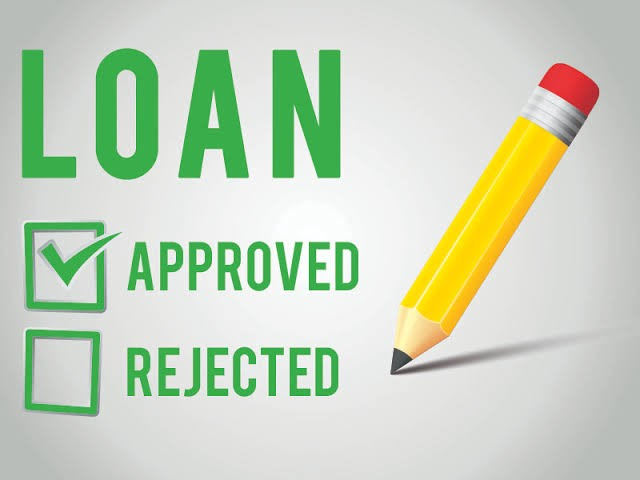

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#Importing Dataset

In [ ]:
df=pd.read_csv("/content/loan_dataset.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#Checking Null Values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Statistical Summary

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#ratio of null values
df.isnull().sum()/df.shape[0] *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
missing_data=pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/df.shape[0])*100})
missing_data

,total_missing,perc_missing
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


#Displaying the Plots

In [ ]:
import seaborn as sns

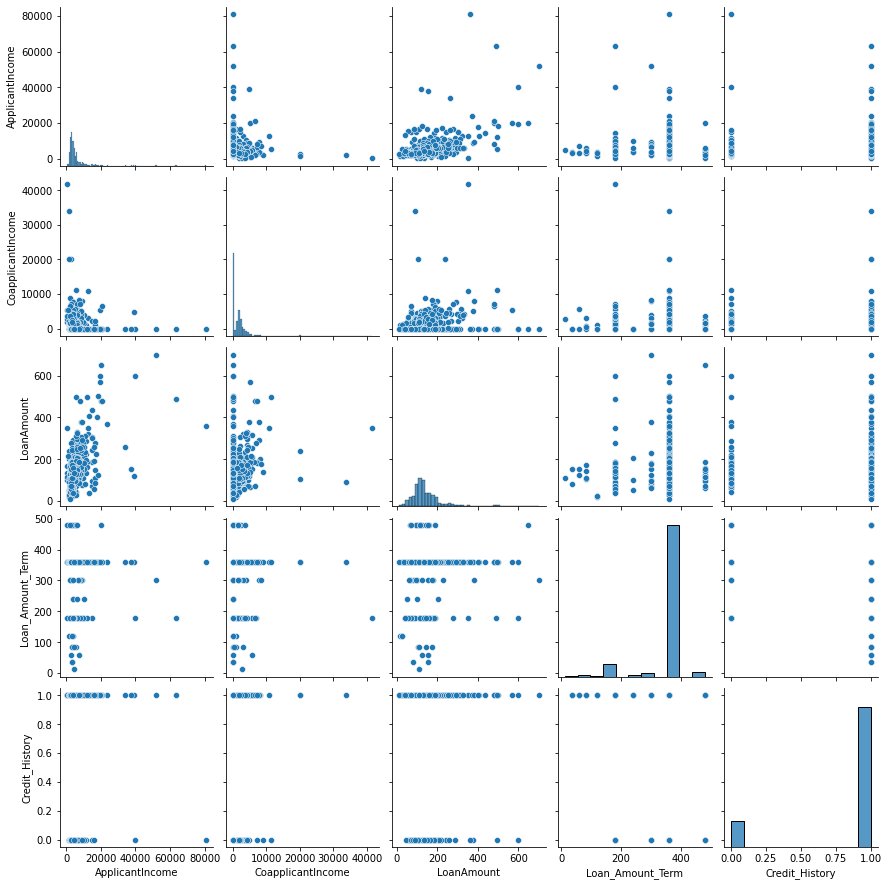

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


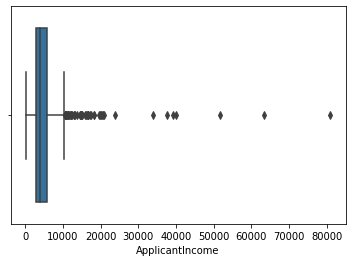

In [ ]:
sns.boxplot(df['ApplicantIncome'])

In [ ]:
mean_value=df['LoanAmount'].mean()

In [ ]:
mean_value

146.41216216216216

In [ ]:
df['LoanAmount'].fillna(value=mean_value,inplace=True)

#Treating Algorithms

In [ ]:
 #Removing outliers
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

    
    

#Filtering the Data

In [ ]:
filter = df[(df['LoanAmount'] >= Q1 - 1.5 * IQR) & (df['LoanAmount'] <= Q3 + 1.5 *IQR)]

In [ ]:
filter

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
filter_without = df[(df['LoanAmount']<Q1-1.5*IQR)|(df['LoanAmount']>Q3+1.5*IQR)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


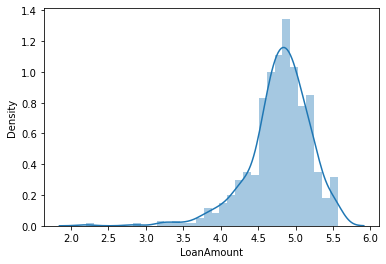

In [ ]:
sns.distplot(np.log(filter['LoanAmount']))

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
sns.distplot(df["ApplicantIncome"])
sns.distplot(df["CoapplicantIncome"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


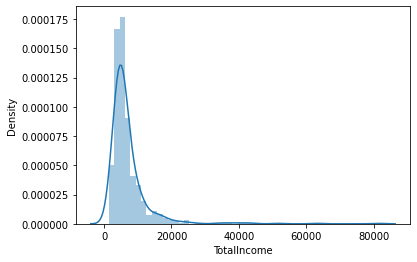

In [ ]:

df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
sns.distplot(df["TotalIncome"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


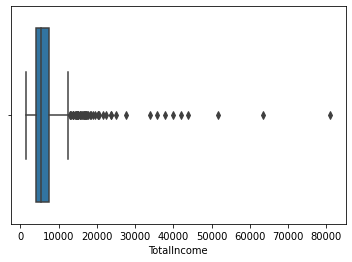

In [ ]:
sns.boxplot(df["TotalIncome"])

In [ ]:
 #Removing outliers
Q1 = df['TotalIncome'].quantile(0.25)
Q3 = df['TotalIncome'].quantile(0.75)
IQR = Q3 - Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR


In [ ]:
filter = df[(df['TotalIncome'] >= Q1 - 1.5 * IQR) & (df['TotalIncome'] <= Q3 + 1.5 *IQR)]
filter

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [ ]:
df['LoanAmountlog']=np.log(df['LoanAmount'])

In [ ]:
df['logAmount']=np.log(df["TotalIncome"])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,logAmount,LoanAmountlog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


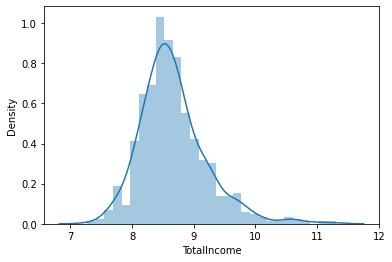

In [ ]:
sns.distplot(np.log(df['TotalIncome']))

In [ ]:
pd.crosstab(df['Education'],df['Gender'])

Gender,0,1
Education,,
0,92,388
1,20,114


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
logAmount             0
LoanAmountlog         0
dtype: int64

In [ ]:
missing_cat_col=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df[['Loan_Amount_Term']] = imp.fit_transform(df[['Loan_Amount_Term']])


In [ ]:
for colname in missing_cat_col:
  df[colname].fillna(df[colname].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
logAmount            0
LoanAmountlog        0
dtype: int64

#Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cols_to_encode=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for x in cols_to_encode:
  df[x]=le.fit_transform(df[x])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,logAmount,LoanAmountlog
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y,5849.0,8.674026,4.986426
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N,6091.0,8.714568,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y,3000.0,8.006368,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y,4941.0,8.505323,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y,6000.0,8.699515,4.948760


#Model 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'logAmount', 'LoanAmountlog'],
      dtype='object')

In [ ]:
feature_cols=['Gender','Married','Dependents','Self_Employed','Property_Area','logAmount','LoanAmountlog','Credit_History']

In [ ]:
feature_cols_1=['Married','Dependents','Self_Employed','Property_Area','logAmount','LoanAmountlog','Credit_History']

In [ ]:
X=df[feature_cols]
y=df['Loan_Status']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7398373983739838

In [ ]:
confusion_matrix(y_test,y_pred)

array([[19, 24],
       [ 8, 72]])

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
!pip install pydotplus

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
dot_data=export_graphviz(model,feature_names=feature_cols) 

In [ ]:
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="Credit_History <= 0.5\ngini = 0.423\nsamples = 491\nvalue = [149, 342]"] ;
1 [label="logAmount <= 8.496\ngini = 0.157\nsamples = 70\nvalue = [64, 6]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 28\nvalue = [28, 0]"] ;
1 -> 2 ;
3 [label="logAmount <= 8.517\ngini = 0.245\nsamples = 42\nvalue = [36, 6]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
3 -> 4 ;
5 [label="Property_Area <= 0.5\ngini = 0.142\nsamples = 39\nvalue = [36, 3]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 15\nvalue = [15, 0]"] ;
5 -> 6 ;
7 [label="LoanAmountlog <= 5.094\ngini = 0.219\nsamples = 24\nvalue = [21, 3]"] ;
5 -> 7 ;
8 [label="gini = 0.337\nsamples = 14\nvalue = [11, 3]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 10\nvalue = [10, 0]"] ;
7 -> 9 ;
10 [label="logAmount <= 7.935\ngini = 0.322\nsamples = 421\nvalue = [85, 336]"] ;
0 -> 10 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
11

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)
img=Image(graph.create_png())

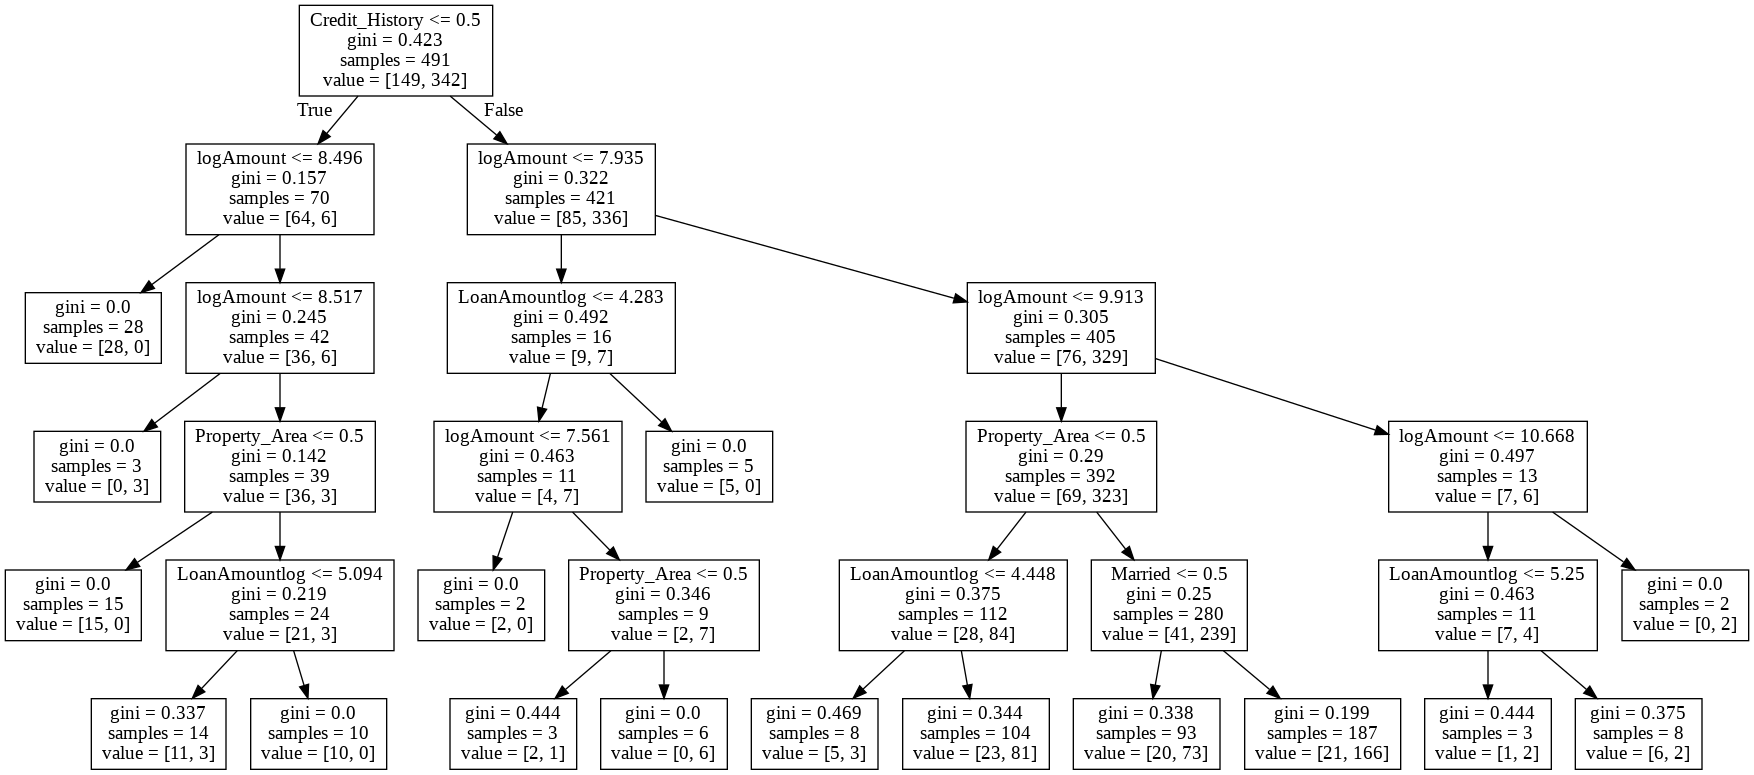

In [ ]:
img

In [ ]:
import collections
colors=('yellow','grey')
edges=collections.defaultdict(list)

for edge in graph.get_edge_list():
  print(edge.get_source(),edge.get_destination())

0 1
1 2
1 3
3 4
3 5
5 6
5 7
7 8
7 9
0 10
10 11
11 12
12 13
12 14
14 15
14 16
11 17
10 18
18 19
19 20
20 21
20 22
19 23
23 24
23 25
18 26
26 27
27 28
27 29
26 30
